In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.734970,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351746,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023178,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296692,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


In [ ]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-12-16,251.039993,251.039993,251.380005,247.649994,247.990005,51694800
2024-12-17,253.479996,253.479996,253.830002,249.779999,250.080002,51356400
2024-12-18,248.050003,248.050003,254.279999,247.740005,252.160004,56774100
2024-12-19,249.789993,249.789993,252.000000,247.089996,247.500000,60882300
2024-12-20,254.490005,254.490005,255.000000,245.690002,248.039993,146890100


In [ ]:
stock_data.shape

(246, 6)

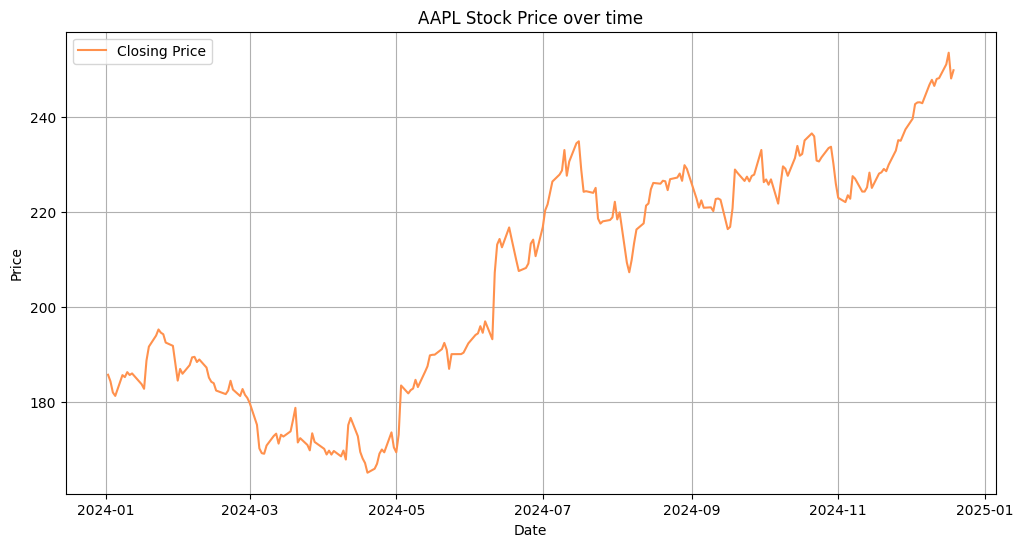

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label = 'Closing Price', color = '#FF914D')
plt.title('AAPL Stock Price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [ ]:
!pip install statsmodels

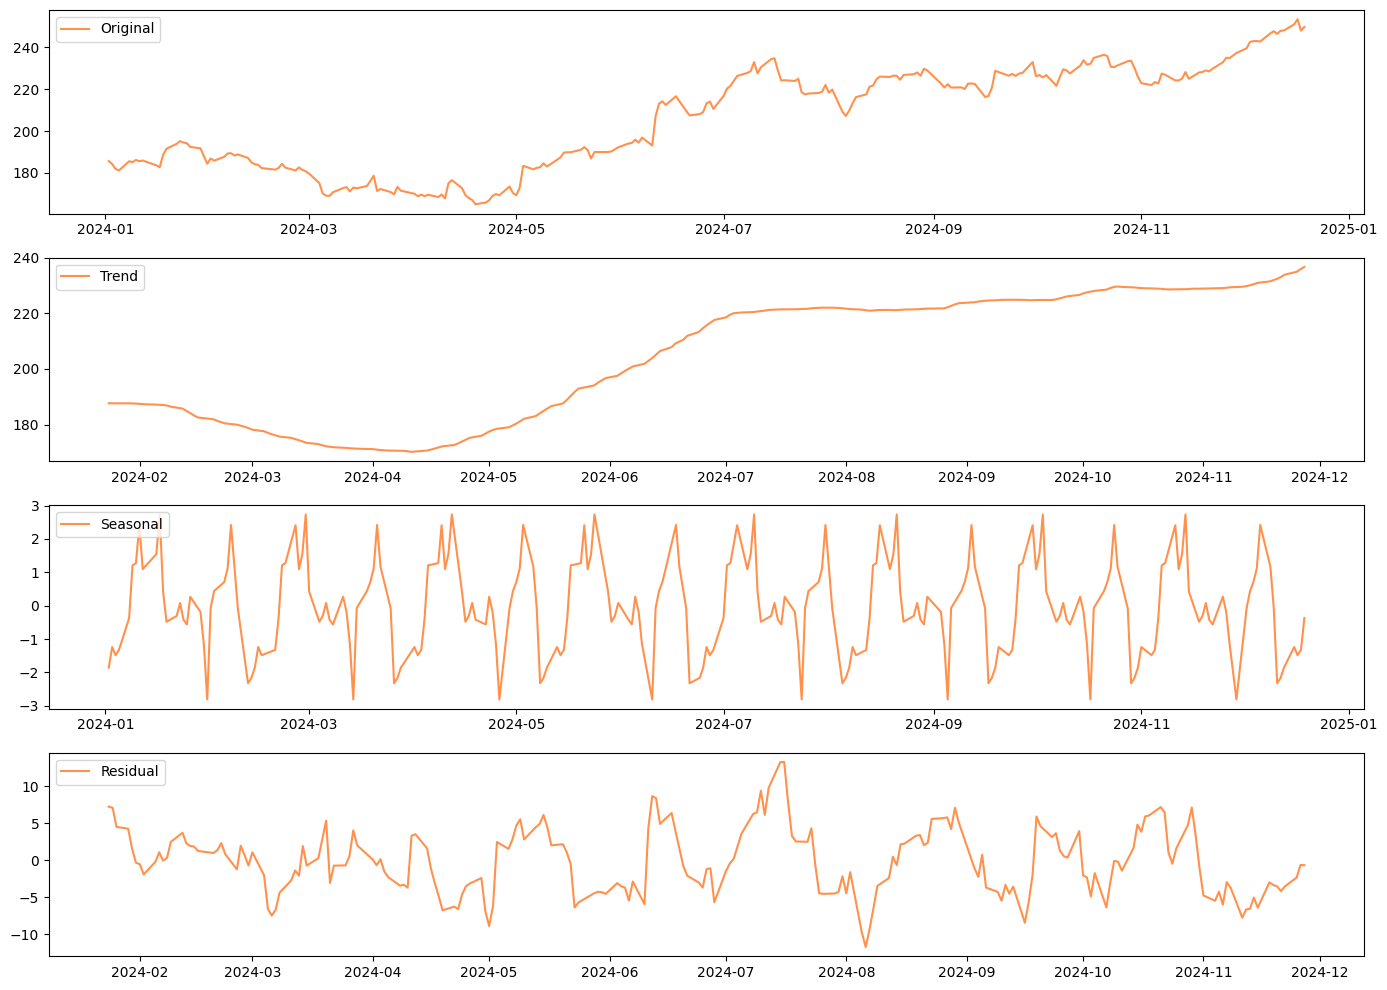

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period = 30)
trend_additive = decomposed_additive.trend
seasonal_additive = decomposed_additive.seasonal
residual_additive = decomposed_additive.resid

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color = '#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# STL Decomposition

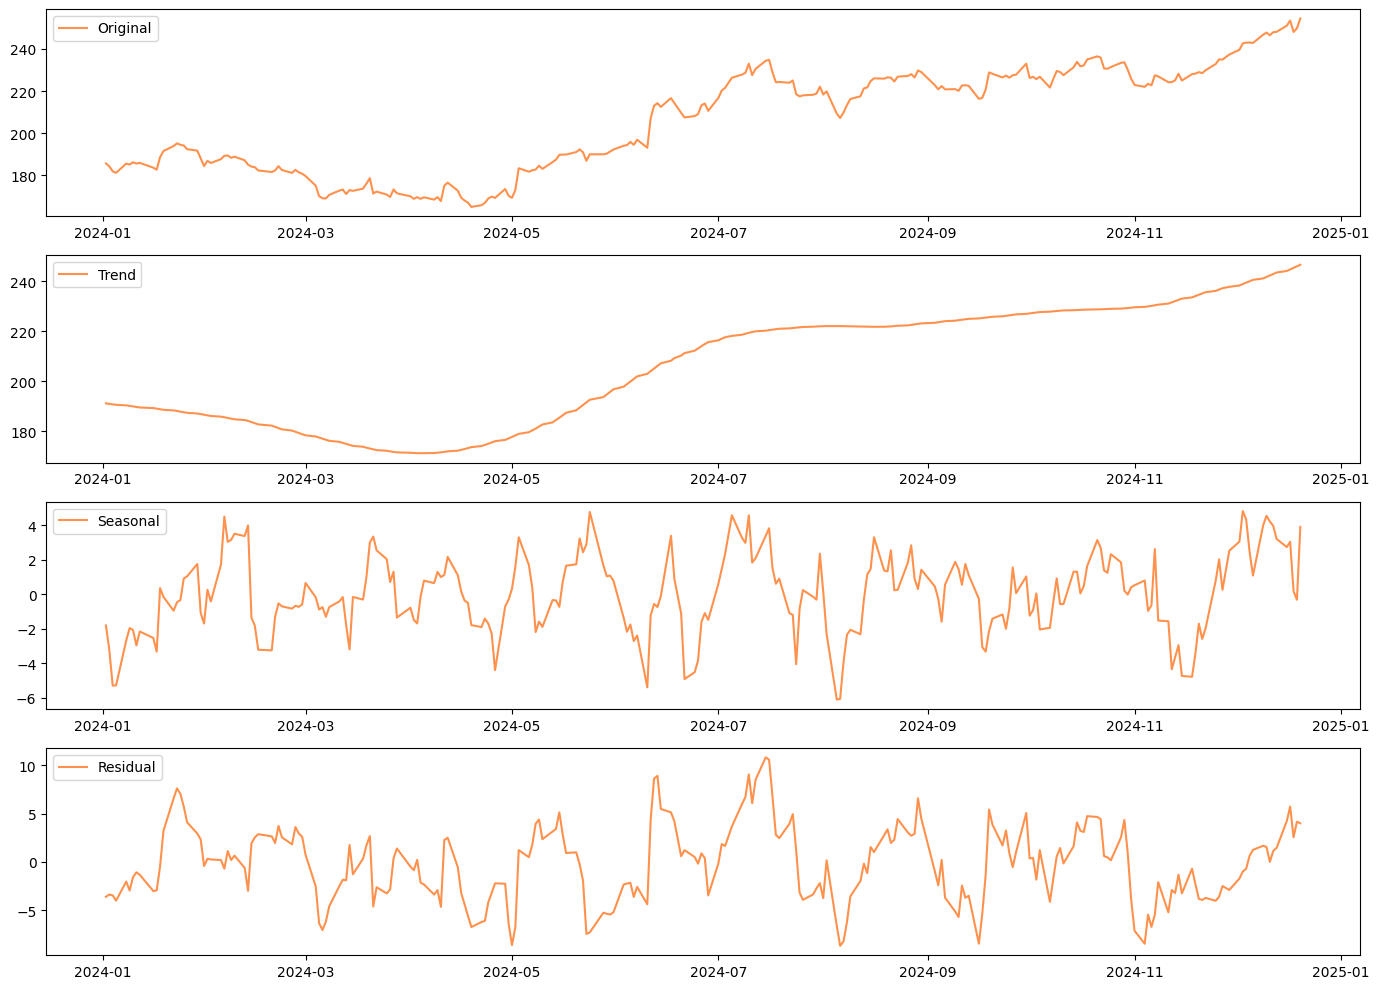

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(stock_data['Close'], period = 30)
result = stl.fit()

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color = '#FF914D')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.734985,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351776,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296707,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test_result = adfuller(stock_data['Close'])

print('ADF Results: ')
print('ADF Statistic: %f' % adf_test_result[0])
print('p-value: %f' % adf_test_result[1])

ADF Results: 
ADF Statistic: -0.042515
p-value: 0.954872


In [ ]:
# The conclusion here is that the data is non-stationary

In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_test_result = kpss(stock_data['Close'], regression = 'ct') # c for constant (level stationarity, ct for trend)

print('KPSS Results: ')
print('KPSS Statistic: %f' % kpss_test_result[0])
print('p-value: %f' % kpss_test_result[1])

KPSS Results: 
KPSS Statistic: 0.202278
p-value: 0.015146


In [ ]:
# 0.01 < 0.05 - we reject the null - non-stationary

# KS-Test

In [ ]:
import numpy as np
from scipy.stats import ks_2samp

np.random.seed(0)
n = 500

strict_stationary_data = np.random.normal(0,1,n)

non_strict_series = np.concatenate([
    np.random.normal(0,1,n//2),
    np.random.normal(0,2,n//2)
])

def ks_test(series):
  split = len(series)//2
  series_first_half = series[:split]
  series_second_half = series[split:]
  ks_stat, p_value = ks_2samp(series_first_half, series_second_half)
  return ks_stat, p_value

ks_stat_stationary, p_value_stationary = ks_test(strict_stationary_data)
ks_stat_non_stationary, p_value_non_stationary = ks_test(non_strict_series)

print("P-value for strict stationary data:", p_value_stationary)
print("P-value for non-strict stationary data:", p_value_non_stationary)


P-value for strict stationary data: 0.6109101078019121
P-value for non-strict stationary data: 0.00040888636357191906


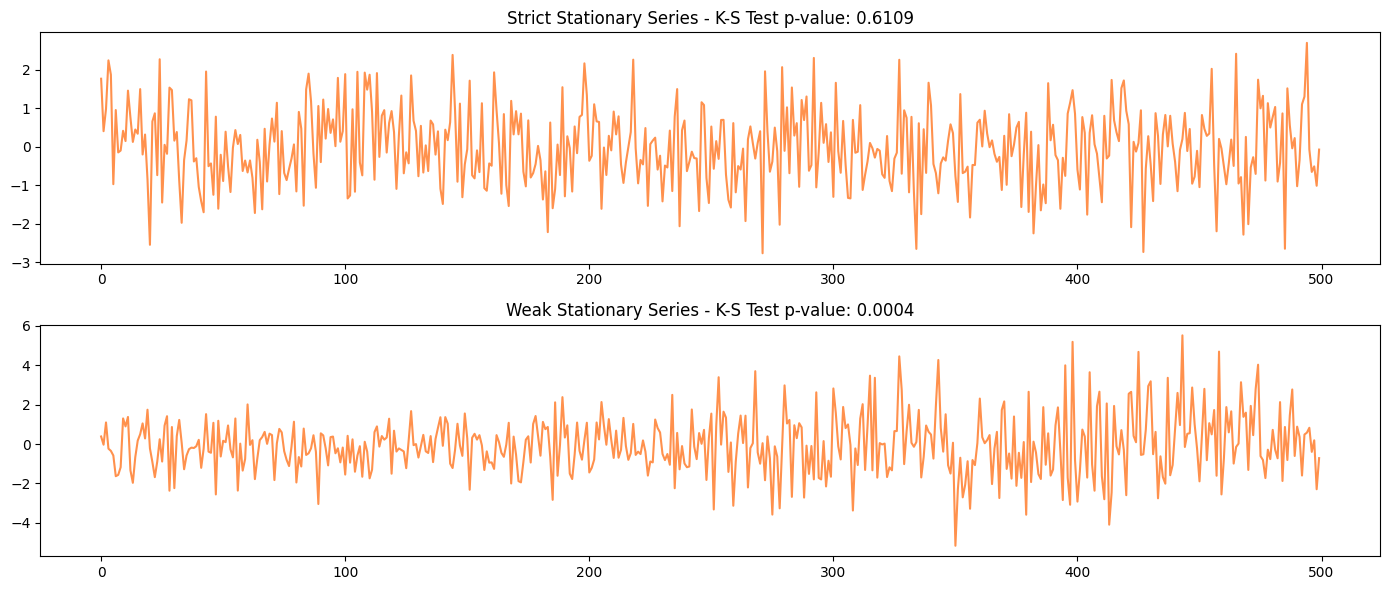

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(strict_stationary_data, color = '#FF914D')
plt.title(f'Strict Stationary Series - K-S Test p-value: {p_value_stationary:.4f}')

plt.subplot(2, 1, 2)
plt.plot(non_strict_series, color = '#FF914D')
plt.title(f'Weak Stationary Series - K-S Test p-value: {p_value_non_stationary:.4f}')

plt.tight_layout()
plt.show()


In [ ]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

In [ ]:
type(stock_data['Close'])

pandas.core.frame.DataFrame

In [ ]:
stock_data['Close']

Ticker,AAPL
Date,
2024-01-02,185.639999
2024-01-03,184.250000
2024-01-04,181.910004
2024-01-05,181.179993
2024-01-08,185.559998
...,...
2024-12-16,251.039993
2024-12-17,253.479996
2024-12-18,248.050003


In [ ]:
stock_data['Close'].diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,-1.389999
2024-01-04,-2.339996
2024-01-05,-0.730011
2024-01-08,4.380005
...,...
2024-12-16,2.909988
2024-12-17,2.440002
2024-12-18,-5.429993


In [ ]:
stock_data['Close'].diff().diff() # this will give me second order differences)

In [ ]:
# We do not go beyond third order differencing, because you might end up losing all the patterns from the data
# - Over-differencing

In [ ]:
first_order_differences = stock_data['Close'].diff()

In [ ]:
kpss_test(first_order_differences.dropna())

KPSS Statistic: 0.17090456945350507
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


<ipython-input-22-392cc155deda>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


In [ ]:
# 0.1 > 0.05, we fail to reject null - stationary

In [ ]:
import numpy as np
from scipy import stats

prices = stock_data['Close']

# Log transformation
prices_log = np.log(prices)

# Square root transformation
prices_sqrt = np.sqrt(prices)

# Check the stationarity of log prices and sqrt prices

In [ ]:
# de-ternding
from statsmodels.tsa.seasonal import STL
stl = STL(stock_data['Close'], period = 30)
result = stl.fit()

trend = result.trend

In [ ]:
trend.values.shape

(246,)

In [ ]:
stock_data['Close'].values.flatten().shape

(246,)

In [ ]:
detrended_data = stock_data['Close'].values.flatten() - trend.values

In [ ]:
detrended_data.shape

(246,)

In [ ]:
kpss_test(detrended_data)

KPSS Statistic: 0.06429496234813631
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


<ipython-input-22-392cc155deda>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


In [ ]:
# What if you want to make seasonal adjustment?

In [ ]:
# making data stationary before model fitting
stock_data = yf.download('AAPL', start='2022-01-01')

apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_data, order=(0,0,30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Auto regressive Moving Average (ARMA) model to the training data
model = ARIMA(train_data, order=(20,0,30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False)